In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(777)
# 이미지 크기를 128 x 128 로 조정합니다
IMAGE_SIZE = 128
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [3]:
test_dataset=ImageFolder(root='test_image/',
                         transform=transforms.Compose([
                             transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                             transforms.ToTensor()
                         ]))

In [4]:
test_loader=DataLoader(test_dataset,
                       batch_size=10,
                       shuffle=False,
                       num_workers=1)

In [6]:
test_images, labels=next(iter(test_loader))
print(test_images.size(), labels.size())
print(labels)

torch.Size([10, 3, 128, 128]) torch.Size([10])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


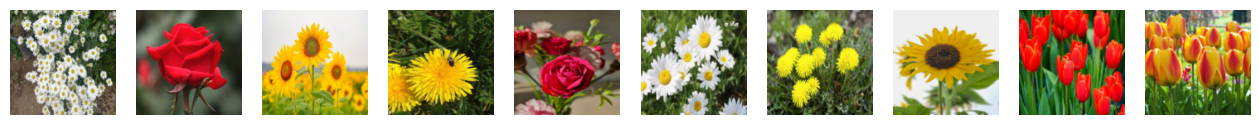

In [8]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1,10, i+1)
    plt.imshow(test_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [12]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        # 입력(3, 128, 128)
        self.conv1=nn.Conv2d( #3, 128,128
            in_channels=3,
            out_channels=8,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv2=nn.Conv2d( #8, 64,64
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv3=nn.Conv2d( #16, 32,32
            in_channels=16,
            out_channels=32,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv4=nn.Conv2d( #32, 16,16
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv5=nn.Conv2d( #64, 8,8
            in_channels=64,
            out_channels=128,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1=nn.Linear(128*4*4, 128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,5)
    
    def forward(self, x): #(3,128,128)
        x=self.conv1(x)
        x=torch.relu(x)
        x=self.pool(x) #(8,64,64)
        x=self.conv2(x)
        x=torch.relu(x)
        x=self.pool(x) #(16,32,32)
        x=self.conv3(x)
        x=torch.relu(x)
        x=self.pool(x) #(32,16,16)
        x=self.conv4(x)
        x=torch.relu(x)
        x=self.pool(x) #(64,8,8)
        x=self.conv5(x)
        x=torch.relu(x)
        x=self.pool(x) #(128,4,4)

        x=x.view(-1, 4*4*128)
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        x=torch.softmax(x, dim=1)
        return x

In [13]:
model2=CNN().to(device)
model2.load_state_dict(torch.load('model.pt'))
model2.eval()

C:\Users\it\AppData\Local\Temp\ipykernel_16268\1862611558.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('model.pt'))


CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

In [14]:
predict=model2(test_images.to(device)).argmax(dim=1)
print(predict)

tensor([1, 2, 3, 1, 4, 0, 3, 3, 4, 4])


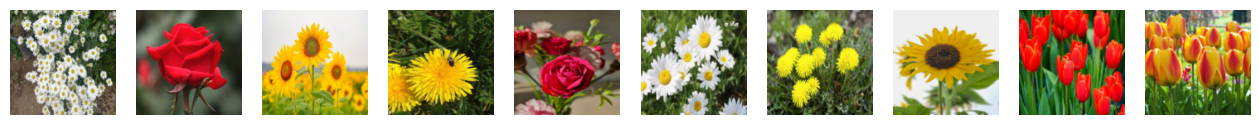

In [15]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1,10, i+1)
    plt.imshow(test_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()